## **AIM:**
To address a research gap identified in the paper:
  ### “Enhancing Disease Prediction through Ensemble Learning Techniques” (IEEE).


## **GAP IDENTIFIED:** 
The paper discusses various ensemble methods such as bagging, boosting, and stacking for disease prediction. However, it lacks a detailed analysis of hyperparameter tuning and how it affects performance across these ensemble methods.

To fill this gap, ensemble models were implemented on the Breast Cancer Wisconsin dataset and hyperparameter tuning was conducted to analyze improvements in prediction accuracy.

#  **Breast Cancer Tumor Classification Using Ensemble Learning**
## **Objective:** 

Classify tumors as malignant or benign using ensemble methods and hyperparameter tuning, addressing the gap of analyzing hyperparameter impact in ensemble models.

# **Step 1:** **Import Libraries**
Import libraries for data handling, modeling, tuning, and visualization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2: Load Dataset**
Load Breast Cancer dataset from scikit-learn and inspect its structure.

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
X.head()


Dataset shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Step 3: Train-Test Split & Scaling** 
Split the data and scale the features.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Step 4: Train Baseline Ensemble Models**
Train Random Forest, Gradient Boosting, and Stacking with default parameters.

In [5]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy (default):", acc_rf)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy (default):", acc_gb)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train_scaled, y_train)
y_pred_stack = stack.predict(X_test_scaled)
acc_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Accuracy (default):", acc_stack)


Random Forest Accuracy (default): 0.956140350877193
Gradient Boosting Accuracy (default): 0.956140350877193
Stacking Accuracy (default): 0.956140350877193


# **Step 5: Hyperparameter Tuning**
Tune hyperparameters for Random Forest and Gradient Boosting using GridSearchCV.

In [6]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Random Forest Accuracy (tuned):", acc_best_rf)
print("Best RF Parameters:", grid_rf.best_params_)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train)
best_gb = grid_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test_scaled)
acc_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("Gradient Boosting Accuracy (tuned):", acc_best_gb)
print("Best GB Parameters:", grid_gb.best_params_)


Random Forest Accuracy (tuned): 0.9473684210526315
Best RF Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Gradient Boosting Accuracy (tuned): 0.956140350877193
Best GB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


# **Step 6: Stacking with Tuned Models**
Stack tuned Random Forest and Gradient Boosting models and evaluate.

In [7]:
estimators_tuned = [
    ('rf', best_rf),
    ('gb', best_gb)
]
stack_tuned = StackingClassifier(estimators=estimators_tuned, final_estimator=LogisticRegression())
stack_tuned.fit(X_train_scaled, y_train)
y_pred_stack_tuned = stack_tuned.predict(X_test_scaled)
acc_stack_tuned = accuracy_score(y_test, y_pred_stack_tuned)
print("Stacking Accuracy (tuned):", acc_stack_tuned)


Stacking Accuracy (tuned): 0.956140350877193


# **Step 7: Model Evaluation and Visualization**
Compare model accuracies visually and show confusion matrix and classification report for the best tuned model.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


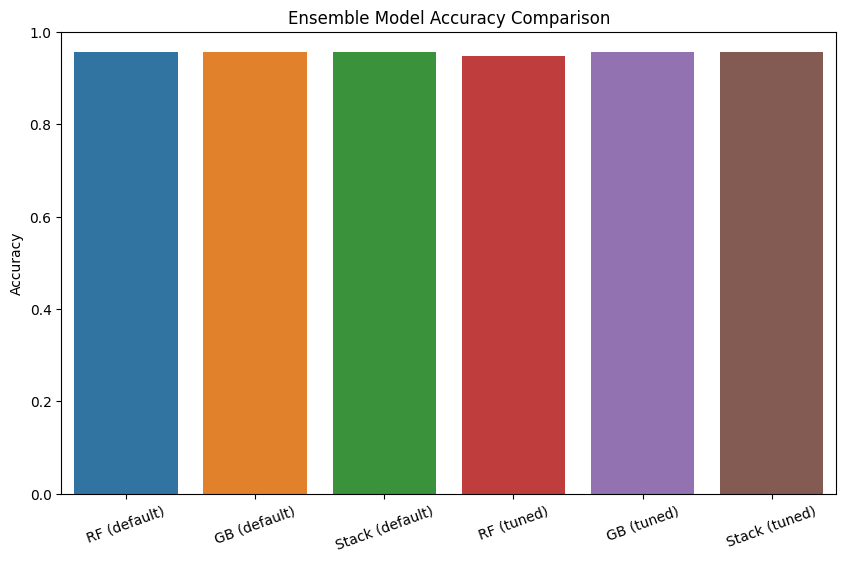

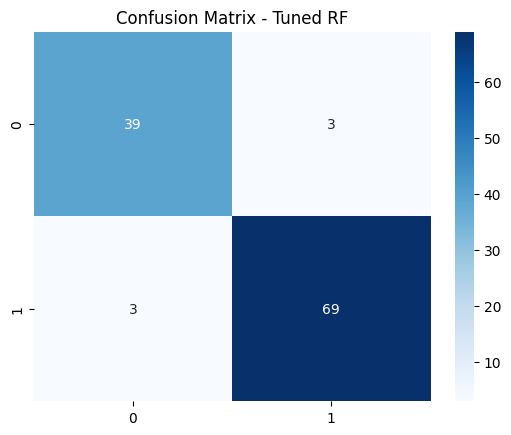

Classification Report - Tuned RF:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [8]:
models = ['RF (default)', 'GB (default)', 'Stack (default)', 'RF (tuned)', 'GB (tuned)', 'Stack (tuned)']
accuracies = [acc_rf, acc_gb, acc_stack, acc_best_rf, acc_best_gb, acc_stack_tuned]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Ensemble Model Accuracy Comparison')
plt.ylim(0,1)
plt.xticks(rotation=20)
plt.show()

cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned RF")
plt.show()

print("Classification Report - Tuned RF:\n")
print(classification_report(y_test, y_pred_best_rf))


# **Step 8: Feature Importance**
Visualize top 10 feature importances from the best Random Forest model.

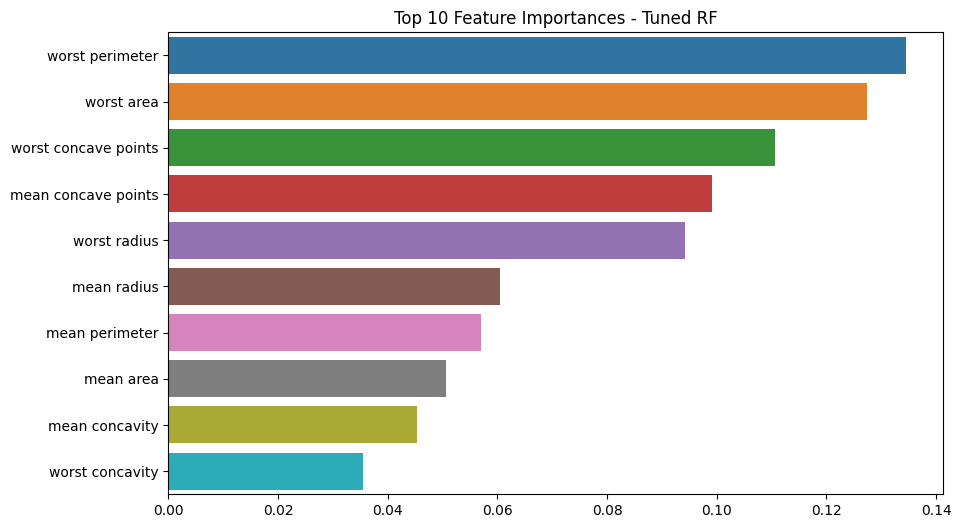

In [9]:
importances = best_rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances - Tuned RF")
plt.show()
